# ZOC Group Of Companies - Customer Churn Analysis

### Importating Libraries

This stage is to some of import the necessary librarires that will be used in this project.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

## Exploratory Data Analysis

### Transferring Train Data

This is to take a look at the train data that I will be usin in order to make the prediction.

In [79]:
data = pd.read_csv('train_data.csv')

In [80]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [81]:
data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6995,15628999,Townsend,732,France,Male,79,10,61811.23,1,1,1,104222.80,0
6996,15661708,She,508,France,Female,41,5,0.00,2,1,1,94170.84,0
6997,15593900,Belousov,705,France,Male,38,1,189443.72,1,0,1,106648.58,0
6998,15570087,Parry-Okeden,664,France,Female,44,8,142989.69,1,1,1,115452.51,1
6999,15639549,Jen,718,Germany,Female,33,4,70541.06,1,0,0,88592.80,0


In [82]:
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

This code reveals all the data types of the features of the dataset to view which ones need to be converted to numeric values.

In [83]:
data.shape

(7000, 13)

This code reveals that there are 7000 records and 13 attributes

#### Checking for and Removing Redundant Values

In [84]:
data.drop(['Surname','CustomerId'], axis=1, inplace=True)

In [85]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

This reveals that there is no missing data in this dataset

In [86]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [87]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows.shape)

number of duplicate rows: (0, 11)


From this we can see that no two records had the same information so we do not need to drop duplicates

### Encoding the non-numeric variables

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [89]:
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

### Finding Outliers

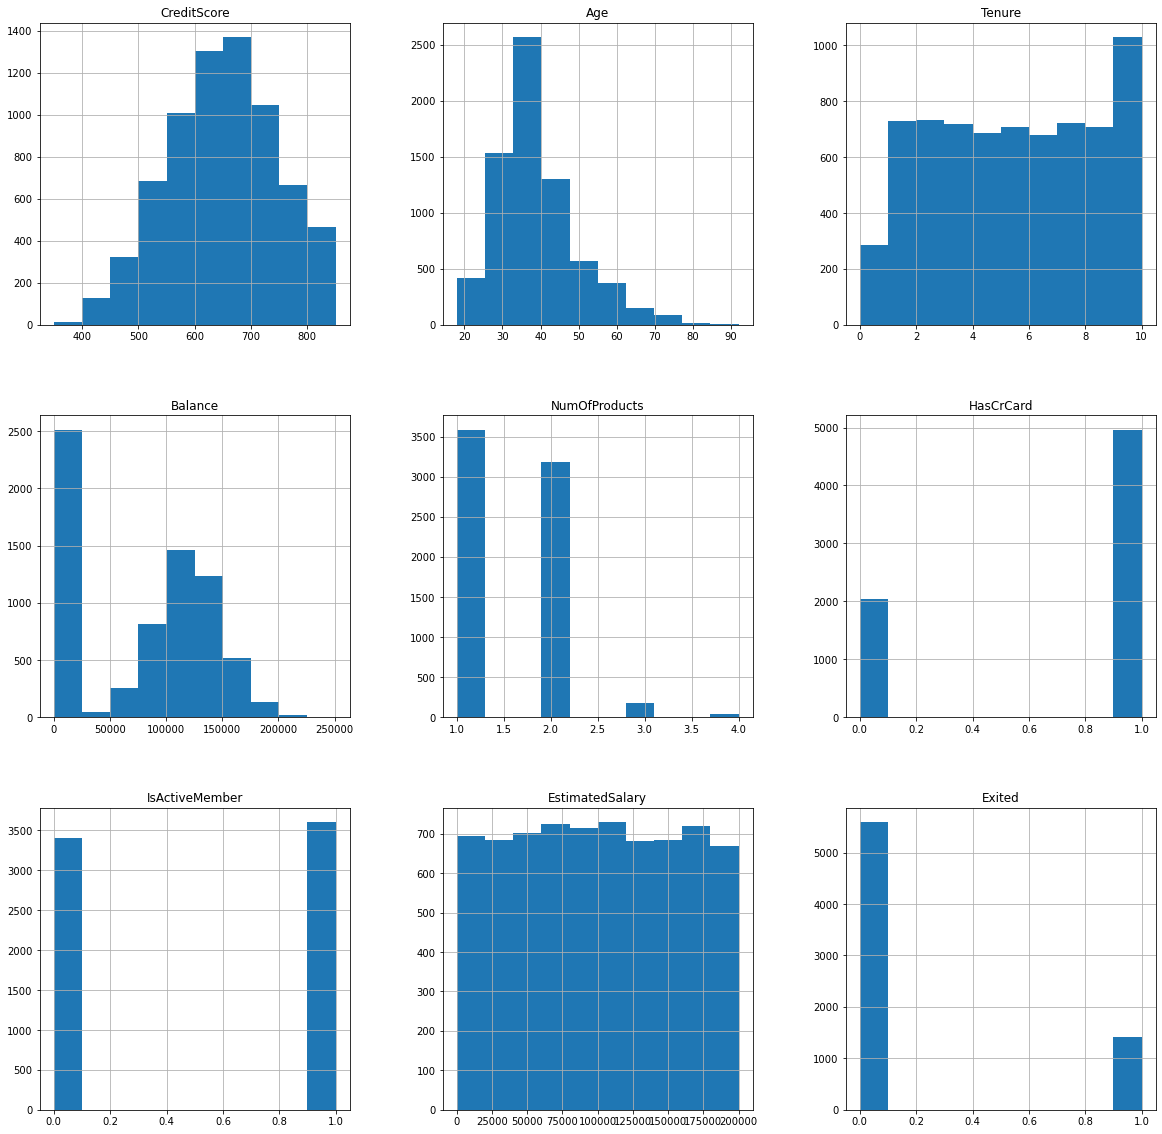

In [398]:
data.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='Age'>

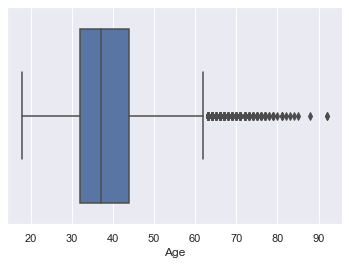

In [90]:
sns.boxplot(x=data['Age'])

Age has outliers from around 87 to about 92

<AxesSubplot:xlabel='EstimatedSalary'>

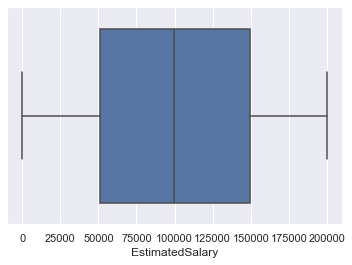

In [71]:
sns.boxplot(x=data['EstimatedSalary'])

Estimated Salary has no outlier from this plot.

<AxesSubplot:xlabel='NumOfProducts'>

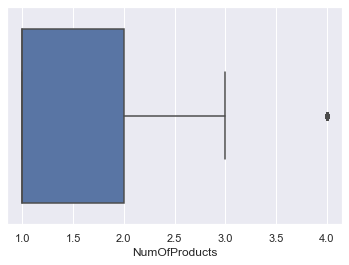

In [72]:
sns.boxplot(x=data['NumOfProducts'])

<AxesSubplot:xlabel='CreditScore'>

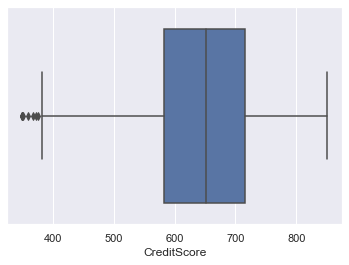

In [91]:
sns.boxplot(x=data['CreditScore'])

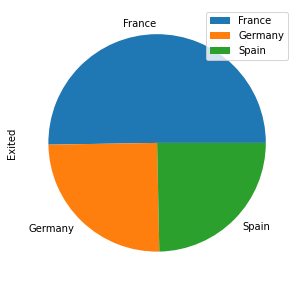

In [399]:
df_geo = data.groupby(['Geography']).count()[['Exited']]
df_geo.head()
df_geo.plot.pie(y='Exited', figsize=(5, 5))
plt.legend(loc = 0)
plt.show()

Most of the customers are from France while it seems like Spain and Germany almost equally share the rest.

/Users/pan-atlantic/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


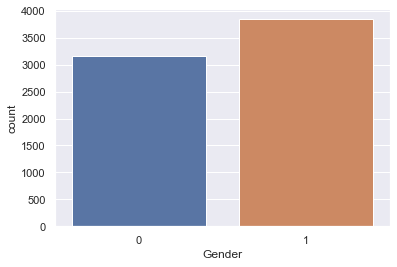

In [401]:
print("Percentage of exiting customers is {:.1f}% and non-existing customers is: {:.1f}%".format(
data[data['Exited'] == 1].shape[0] / data.shape[0]*100,
data[data['Exited'] == 0].shape[0] / data.shape[0]*100))

Percentage of exiting customers is 20.1% and non-existing customers is: 79.9%


In [404]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15804610,Valdez,601,0,0,41,1,0.00,2,0,1,160607.06,0
15574523,Cheng,576,0,1,39,1,0.00,2,1,1,68814.23,0
15587443,Akudinobi,728,0,0,69,1,0.00,2,1,1,131804.86,0
15768682,Amies,640,2,1,39,3,0.00,1,1,1,105997.25,0
15569682,Leckie,768,1,1,37,9,108308.11,1,1,0,41788.25,1


For the gender, 0 is Female and 1 is Male. For geography, 0 is France, 1 is Germany and 2 is Spain.

In [406]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15804610,601,0,0,41,1,0.00,2,0,1,160607.06,0
15574523,576,0,1,39,1,0.00,2,1,1,68814.23,0
15587443,728,0,0,69,1,0.00,2,1,1,131804.86,0
15768682,640,2,1,39,3,0.00,1,1,1,105997.25,0
15569682,768,1,1,37,9,108308.11,1,1,0,41788.25,1


### Correlation

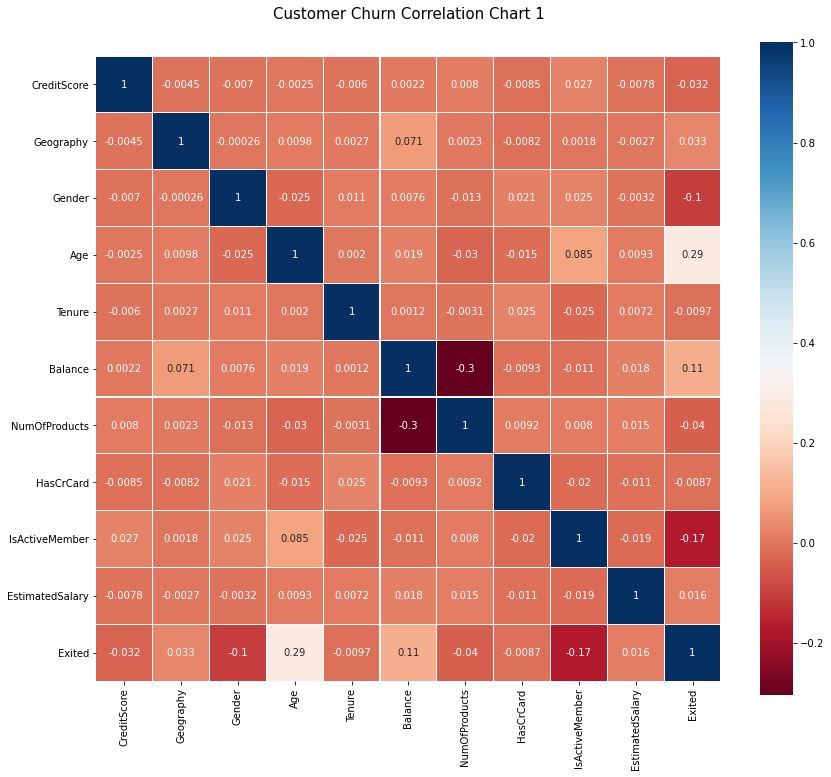

In [407]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Customer Churn Correlation Chart 1', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

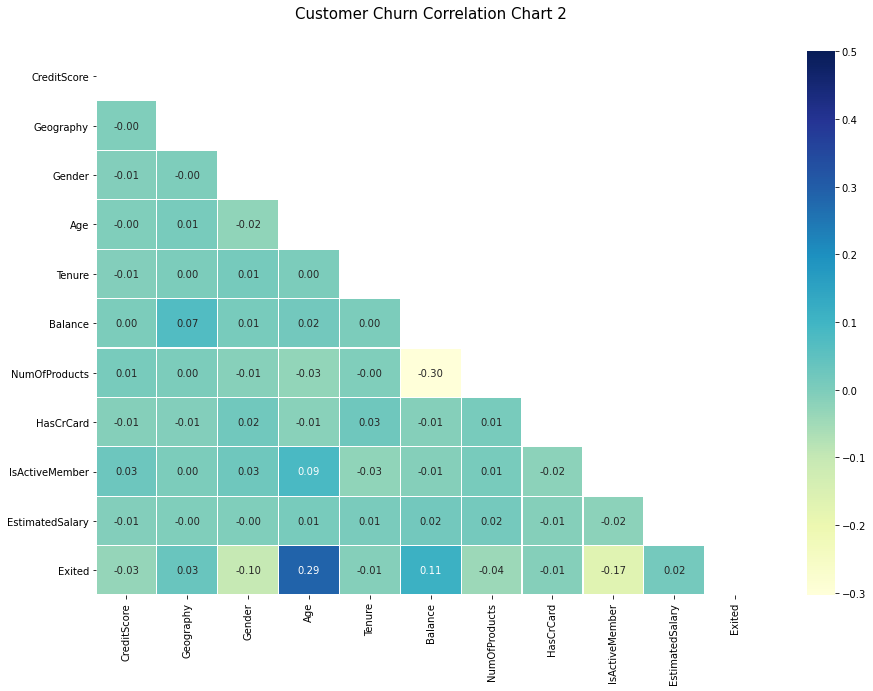

In [408]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
plt.title('Customer Churn Correlation Chart 2', y=1.05, size=15)
sns.heatmap(data.corr(), vmax=.5, mask=mask, annot=True, fmt='.2f', linewidths=.2, cmap="YlGnBu")
plt.show()

In [409]:
correlations = data.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\n')
print('Most Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary    0.016426
Geography          0.032632
Balance            0.111493
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64


Most Negative Correlations: 
 IsActiveMember   -0.167725
Gender           -0.101712
NumOfProducts    -0.040043
CreditScore      -0.032201
Tenure           -0.009668
Name: Exited, dtype: float64


## Findings From The Exploratory Data Analysis

+ The dataset had no erronous or missing data.
+ The strongest positive correlations with the target features are: EstimatedSalary, Geography, Balance and Age.
+ The strongest negative correlations with the target features are: IsActiveMember, Gender, NumofProducts, CreditScore, Tunure.
+ The dataset is imbalanced with the majoriy of observations describing non-exiting customers. 
+ The features that are redundant for our analysis are CustomerId, Gender and Surname.

# Features Selection

In [410]:
features = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
target = data['Exited']

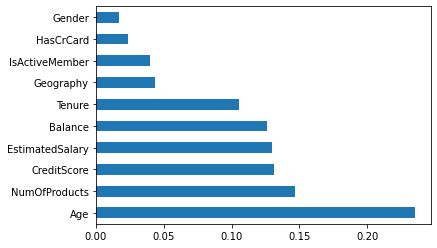

In [411]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features,target)
feat_importance = pd.Series(model.feature_importances_,index=features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

## Defining Train_Data and Test_Data Features and Target

In [525]:
train_data = data

In [526]:
train_features = train_data[['CreditScore',  'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]
train_target = train_data['Exited']

In [527]:
test_data = pd.read_csv('test_data.csv')

In [528]:
test_features = test_data[['CreditScore',  'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

## Machine Learning Models

#### Decision Tree

In [416]:
from sklearn.tree import DecisionTreeClassifier

In [417]:
clasifier1 = DecisionTreeClassifier()
model1 = clasifier1.fit(train_features, train_target)

In [418]:
pred_target1 = model1.predict(test_features)

In [419]:
ditt1 = {'CustomerId':test_data['CustomerId'], 'Exited': pred_target1}

In [420]:
solution1 = pd.DataFrame(ditt1)
solution1.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,1
3,15582591,0
4,15595937,0


In [421]:
#solution1.to_csv('solution6.csv', index = False)

#### Logistic Regression

In [422]:
from sklearn.linear_model import LogisticRegression
clasifier2 = LogisticRegression()
model2 = clasifier2.fit(train_features, train_target)

In [423]:
pred_target2 = model2.predict(test_features)

In [424]:
ditt2 = {'CustomerId':test_data['CustomerId'], 'Exited': pred_target2}

In [425]:
solution2 = pd.DataFrame(ditt2)
solution2.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,0
3,15582591,0
4,15595937,0


In [426]:
#solution2.to_csv('solution7.csv', index = False)

#### Random Forest

In [427]:
from sklearn.ensemble import RandomForestClassifier
clasifier3 = RandomForestClassifier(n_estimators=200, )
model3 = clasifier3.fit(train_features, train_target)

In [428]:
pred_target3 = model3.predict(test_features)

In [429]:
ditt3 = {'CustomerId':test_data['CustomerId'], 'Exited': pred_target3}

In [430]:
solution3 = pd.DataFrame(ditt3)
solution3.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,1
3,15582591,1
4,15595937,0


In [431]:
solution3.to_csv('solution20.csv', index = False)

#### Support Vector Machine

In [432]:
from sklearn.svm import SVC
clasifier4 = SVC(kernel='poly', random_state=0)
model4 = clasifier4.fit(train_features, train_target)

In [433]:
pred_target4 = model4.predict(test_features)

In [434]:
ditt4 = {'CustomerId':test_data['CustomerId'], 'Exited': pred_target4}

In [435]:
solution4 = pd.DataFrame(ditt4)
solution4.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,0
3,15582591,0
4,15595937,0


In [436]:
#solution4.to_csv('solution9.csv', index = False)

#### Gradient Boosting Algorithm

In [520]:
from sklearn.ensemble import GradientBoostingClassifier
clasifier5 = GradientBoostingClassifier()
model5 = clasifier5.fit(train_features, train_target)

In [521]:
pred_target5 = model5.predict(test_features)

In [522]:
ditt5 = {'CustomerId':test_data['CustomerId'], 'Exited': pred_target5}

In [523]:
solution5 = pd.DataFrame(ditt5)
solution5.head()

,CustomerId,Exited
0,15642544,0
1,15779492,1
2,15815271,1
3,15582591,0
4,15595937,0


In [524]:
solution5.to_csv('solution19.csv', index = False)